### Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Обзор данных

In [20]:
import pandas as pd
from plotly import graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
try:
    data = pd.read_csv('rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')
    data.head()

In [3]:
# Проверка на нулевые значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
#Проверка на неявные дубликаты в категориальных переменных
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [6]:
#Проверка на аномалии
data['number'].min()

0

In [7]:
data[data['number']==0].head()

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


In [8]:
data['number'].max()

1700

In [9]:
data[data['number']==1700]

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [10]:
data = data.drop(data[data.drop('id', axis=1).duplicated()].index)
print(data.duplicated().sum())

0


<b>На первом этапе анализа дубликатов и аномальных значений не выявлено.</b>

## Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [24]:
df = data.groupby('object_type').count()
df = df.reset_index()
df = df[['object_type', 'id']]
df_total = df['id'].sum()
df['percent'] = round(df['id']/df_total*100)
df.sort_values(by='id', ascending=False)

,object_type,id,percent
3,кафе,6071,40.0
8,столовая,2584,17.0
7,ресторан,2282,15.0
6,предприятие быстрого обслуживания,1898,12.0
0,бар,855,6.0
1,буфет,577,4.0
4,кафетерий,395,3.0
2,закусочная,349,2.0
5,магазин (отдел кулинарии),273,2.0


In [26]:
fig = go.Figure(data=[go.Pie(labels=df['object_type'], textposition='outside',
                             values=df['id'],
                             title='Соотношение видов объектов общественного питания')])
fig.show() 

<b>Кафе наиболее популярное заведение в Москве, второе место занимают столовые. Отдел в кулинарии не пользуется популярностью у предпринимателей.</b>

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [27]:
df = data.groupby('chain').count()
df = df.reset_index()

In [28]:
t = df['id']
title = df['chain']
fig = go.Figure(data=[go.Pie(labels=['Сетевые','Несетевые'], textposition='outside',
                             values=t, title='Соотношение сетевых и несетевых заведений')])
fig.show() 

<b>Сетевых заведений в 4 раза меньше чем несетевых, в целом создать сеть это большой труд. </b>

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [29]:
df_c = data.query('chain=="да"').groupby('object_type')['id'].count().reset_index()
c = data.groupby('object_type')['id'].count().reset_index()

In [30]:
df_c= df_c.merge(c, on='object_type')
df_c['percent'] = round(df_c['id_x']/df_c['id_y']*100,1)
df_c

,object_type,id_x,id_y,percent
0,бар,37,855,4.3
1,буфет,11,577,1.9
2,закусочная,56,349,16.0
3,кафе,1396,6071,23.0
4,кафетерий,52,395,13.2
5,магазин (отдел кулинарии),78,273,28.6
6,предприятие быстрого обслуживания,788,1898,41.5
7,ресторан,543,2282,23.8
8,столовая,3,2584,0.1


In [31]:
fig = px.histogram(data, x='object_type', color='chain', barnorm='percent', 
                   barmode='group')
fig.update_layout(title_text='Характерный тип заведений для сетевиков',
                  xaxis_title="Тип заведения",
                  yaxis_title="Соотношение в процентах")
fig.show()

##### Для сетевиков характерны ПБО, отдел кулинарии в магазинах и рестораны. Значит можно смело открывать кафе без опаски конкуренции с сетевиками.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [32]:
# Выберем только сетевиков, посчитаем общее количество точек и разделим на общее кол-во мест.
# Далее отсортируем по количеству точек и продолжим анализ
df_c2 = data.query('chain=="да"').groupby('object_name').agg({'id':'count', 'number':'mean'}).sort_values(by='id', ascending=False).reset_index()
df_c2.columns = ['net','count', 'seats']
df_c2 = df_c2.loc[df_c2['count'] != 1]
df_c2

,net,count,seats
0,KFC,155,55.341935
1,Шоколадница,141,56.170213
2,Бургер Кинг,122,45.016393
3,Макдоналдс,121,82.173554
4,Домино'с Пицца,86,18.209302
...,...,...,...
269,Correas,2,50.000000
270,НИЯМА,2,69.000000
271,Азбука вкуса,2,19.000000
272,Бенто WOK,2,18.000000


In [34]:
df_c2.describe()

,count,seats
count,274.000000,274.000000
mean,9.175182,57.743796
std,19.464591,48.462715
min,2.000000,0.000000
25%,2.000000,20.083333
50%,3.000000,44.791530
75%,7.000000,83.104167
max,155.000000,245.000000


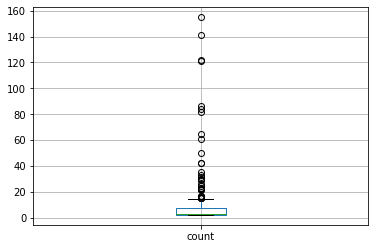

In [58]:
df_c2[['net','count']].boxplot()
plt.show()

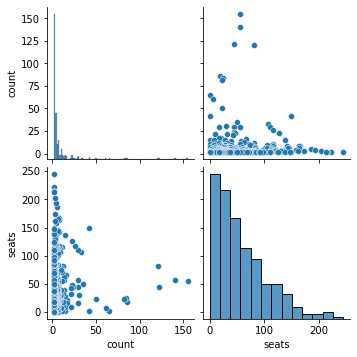

In [35]:
sns.pairplot(df_c2)
plt.show()

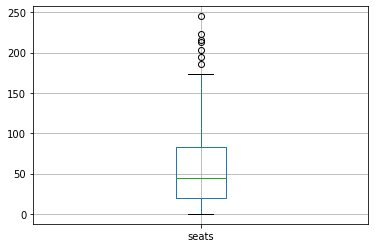

In [36]:
df_c2[['net','seats']].boxplot()
plt.show()

Если с местами видно нормальное распределение, то количество заведений в сети разнится. Так будем считать, что 75% сетей это то число, показатели которого можно считать основополагающими. И у этих сетей количество заведений не превышает семи (это мало). Однако 25 процентов заведений содержат 155 точек(это много). Границы второго и третьего квартиля посадочных мест сводятся на 44 и 83(Это много). 
#### На основании этого можно сделать вывод, что большинство сетей предпочитают небольшое число заведений с большим количеством мест

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [37]:
df_cl = data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
df_cl['number'] = round(df_cl['number'], 1)
df_cl

,object_type,number
0,столовая,130.3
1,ресторан,96.9
2,буфет,51.5
3,бар,43.5
4,кафе,39.8
5,предприятие быстрого обслуживания,20.8
6,кафетерий,9.2
7,закусочная,7.8
8,магазин (отдел кулинарии),5.6


In [38]:
data.groupby('object_type').agg({'number':['mean','median']}).reset_index()

object_type      number       
                                            mean median
0                                бар   43.533333     35
1                              буфет   51.509532     32
2                         закусочная    7.825215      0
3                               кафе   39.785703     30
4                          кафетерий    9.184810      6
5          магазин (отдел кулинарии)    5.589744      0
6  предприятие быстрого обслуживания   20.808219      6
7                           ресторан   96.884750     80
8                           столовая  130.337848    103

In [39]:
fig = go.Figure(data=[go.Bar(x = df_cl['object_type'],
                             y = df_cl['number'],
                             text= df_cl['number'],
                             textposition = 'outside',
                             #figsize = (9,9)
                             )])
fig.update_layout(title_text='Среднее количество мест')
fig.show()

##### Столовые и рестораны предоставляют в среднем самое большое количество посадочных мест

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [42]:
# дополним наш датасет информацией о конкретных улицах
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'тупик',
              'площадь', 'съезд', 'переулок', 'проспект',
              'набережная', 'аллея', 'квартал', 'линия']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
data['street'] = data['address'].apply(get_street)
data['street'] = data['street'].str.strip()
new_data = data
new_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [46]:
print(new_data['street'].isna().sum())
new_data[new_data['street'].isna()].head()
# Существует 381 точка, которая не имеет конкретной улицы.
# Я принимаю решение не учитывать данные объекты, так как их число незначительно

381


,id,object_name,chain,object_type,address,number,street
1405,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1406,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1407,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1408,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45,None


In [47]:
main_street = new_data.groupby(['street']).agg({'id':'count'}).sort_values(by='id', ascending=False).head(10).reset_index()

In [48]:
fig = go.Figure(data=[go.Bar(x = main_street['street'],
                             y = main_street['id'],
                             text= main_street['id'],
                             textposition = 'outside',                            
                             )])
fig.update_layout(title_text='Кол-во заведений по улицам, входящие в разные районы')
fig.show()

In [49]:
# Определим районы Москвы, на которых находятся эти улицы, для этого подключим внешний источник.
try:
    df = pd.read_csv('mosgaz-streets.csv')
except:
    df = pd.read_csv('https://drive.google.com/file/d/10HNxLhllKVu0QFP0QlUsdFDvd-h0dqGK/view?usp=sharing')
df = df.drop(columns = ['areaid','okrug'],axis = 1)
df.columns = ['street', 'district']
df

,street,district
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район
...,...,...
4393,Вознесенский проезд,Пресненский район
4394,Волков переулок,Пресненский район
4395,Поварская улица,Пресненский район
4396,Кудринская площадь,Пресненский район


In [50]:
df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

0


In [51]:
new_data = new_data.merge(df, on='street', how='inner')

In [52]:
new_data.head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район
1,193477,Grill-House,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,Ярославский Район
2,196756,Пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,Ярославский Район
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
4,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Нижегородский район


In [53]:
data_dis = new_data[['street', 'district']]
top_10_dis = main_street.merge(data_dis, how='left', on='street')
top_10_dis.pivot_table(index=['street', 'district']).sort_values(by='id', ascending=False)

id
street                 district                            
проспект Мира          Ярославский Район                204
                       Район Свиблово                   204
                       Район Ростокино                  204
                       Район Марьина роща               204
                       Останкинский район               204
                       Мещанский район                  204
                       Алексеевский район               204
Профсоюзная улица      Район Коньково                   182
                       Академический район              182
                       Обручевский район                182
                       Район Черемушки                  182
                       Район Теплый Стан                182
                       Район Ясенево                    182
Ленинградский проспект Район Сокол                      172
                       Хорошевский район                172
                       Район Аэропорт                   172
                       Район Беговой                    172
Пресненская набережная Пресненский район                167
Варшавское шоссе       Нагорный район                   165
                       Донской район                    165
                       Район Северное Бутово            165
                       Район Южное Бутово               165
                       Район Нагатино-Садовники         165
                       Район Чертаново Южное            165
                       Район Чертаново Центральное      165
                       Район Чертаново Северное         165
Ленинский проспект     Район Якиманка                   148
                       Донской район                    148
                       Район Гагаринский                148
                       Район Тропарево-Никулино         148
                       Район Теплый Стан                148
                       Район Проспект Вернадского       148
                       Обручевский район                148
                       Ломоносовский район              148
проспект Вернадского   Район Раменки                    128
                       Район Тропарево-Никулино         128
                       Ломоносовский район              128
                       Район Гагаринский                128
                       Район Проспект Вернадского       128
Кутузовский проспект   Район Фили-Давыдково             114
                       Район Дорогомилово               114
Каширское шоссе        Район Москворечье-Сабурово       111
                       Район Орехово-Борисово Северное  111
                       Район Орехово-Борисово Южное     111
                       Район Нагатино-Садовники         111
Кировоградская улица   Район Чертаново Северное         108
                       Район Чертаново Центральное      108
                       Район Чертаново Южное            108

#### Улицы с указанием числа заведений, размещены в соответствии с таблицей выше. Стоит учесть, что некоторые улицы в связи с большой протяженностью входят сразу в несколько районов, по этой же причине эти улицы дают возможность разместить на своей территории большое число объектов.

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [54]:
one_rest_on_street = new_data.pivot_table(index=['street'],
                                                      values='id',
                                                      aggfunc='count').reset_index().query('id == 1')
one_rest_on_street

,street,id
2,1-й Балтийский переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
14,1-й Зачатьевский переулок,1
...,...,...
1789,улица Шеногина,1
1792,улица Шумилова,1
1793,улица Шумкина,1
1797,улица Щорса,1


In [55]:
one_rest_on_street_by_district = new_data.pivot_table(index=['street', 'district'], values='id', aggfunc='count').reset_index().query('id == 1')
one_rest_on_street_by_district

,street,district,id
2,1-й Балтийский переулок,Район Аэропорт,1
3,1-й Басманный переулок,Басманный район,1
4,1-й Басманный переулок,Красносельский район,1
5,1-й Ботанический проезд,Район Свиблово,1
8,1-й Вешняковский проезд,Рязанский район,1
...,...,...,...
2298,улица Шеногина,Район Хорошево-Мневники,1
2301,улица Шумилова,Район Кузьминки,1
2302,улица Шумкина,Район Сокольники,1
2307,улица Щорса,Район Солнцево,1


In [56]:
data_street = one_rest_on_street_by_district['district'].value_counts().reset_index()
fig = go.Figure(data=[go.Bar(x = data_street['index'],
                             y = data_street['district'],
                             text= main_street['id'],
                             textposition = 'outside',                            
                             )])
fig.update_layout(title_text='Число улиц с одним объектом питания по районам',yaxis_title="Количество улиц")
fig.show()

#### Как и описывалось выше, одна улица может входить в разные районе, поэтому будет смотреть на таблицу с группировкой по улице и району, число таких улиц 562, с одним заведением, во всех районах Москвы

## Общий вывод:
Самым рентабельным заведением скорее всего станет кафе, ресторан или столовая.  Для нашей цели открыть небольшое заведение, больше всего подходят улицы из списка топ-10 в одном районе, там больше концетрация людей и меньшая площадь<br>
По посадочным местам оптимально:
+ Для ресторанов - 96 мест
+ Для столовых - 130 мест
+ Для кафе - 40 мест
<br>Дальнейшее развитие сети выглядит как превращение в сеть объектов общественного питания, которая будет распространяться по разным районом Москвы. 

## Презентация: https://disk.yandex.ru/i/WKusj-7hs6DDqQ